In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to training and validation data
data_dir = "D:/Major Project/normalized"
train_dir = os.path.join(data_dir, "train")
valid_dir = os.path.join(data_dir, "valid")

# ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Multi-class classification: using all 4 classes
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Inspect class indices
print("Class indices:", train_generator.class_indices)

# Inspect sample batch
x_batch, y_batch = next(train_generator)
print("Sample image batch shape:", x_batch.shape)
print("Sample label batch shape:", y_batch.shape)

# Define the improved multi-class CNN (V6 logic, kept as V5)
model = Sequential()
model.add(Input(shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(160, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))  # 4-class classification output

# Compile the model
optimizer = Adam(learning_rate=3e-5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=30,
    callbacks=[early_stop, lr_scheduler]
)

# Save the trained model
model.save("models/cnn_teeth_health_v5.h5")


Found 13123 images belonging to 4 classes.
Found 4121 images belonging to 4 classes.
Class indices: {'cavity': 0, 'fillings': 1, 'impacted tooth': 2, 'implant': 3}
Sample image batch shape: (32, 224, 224, 3)
Sample label batch shape: (32, 4)
Epoch 1/30


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


411/411 ━━━━━━━━━━━━━━━━━━━━ 583s 1s/step - accuracy: 0.2730 - loss: 1.7866 - val_accuracy: 0.2543 - val_loss: 1.4742 - learning_rate: 3.0000e-05
Epoch 2/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 545s 1s/step - accuracy: 0.2809 - loss: 1.4035 - val_accuracy: 0.2808 - val_loss: 1.3662 - learning_rate: 3.0000e-05
Epoch 3/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - accuracy: 0.2852 - loss: 1.3940 - val_accuracy: 0.2703 - val_loss: 1.3775 - learning_rate: 3.0000e-05
Epoch 4/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 432s 1s/step - accuracy: 0.2808 - loss: 1.3898 - val_accuracy: 0.2720 - val_loss: 1.3774 - learning_rate: 3.0000e-05
Epoch 5/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 431s 1s/step - accuracy: 0.2723 - loss: 1.3799 - val_accuracy: 0.2742 - val_loss: 1.3739 - learning_rate: 3.0000e-05
Epoch 6/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 432s 1s/step - accuracy: 0.2783 - loss: 1.3820 - val_accuracy: 0.2827 - val_loss: 1.3686 - learning_rate: 1.5000e-05
Epoch 7/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.29

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load model
model = load_model("models/cnn_teeth_health_v5.h5")

# Recreate your validation data generator
valid_dir = "D:/Major Project/normalized/valid"
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate the model
loss, accuracy = model.evaluate(valid_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Loss: {loss:.4f}")


Found 4121 images belonging to 4 classes.


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 42s 326ms/step - accuracy: 0.2697 - loss: 1.3697
Validation Accuracy: 28.08%
Validation Loss: 1.3662


Found 3146 images belonging to 4 classes.


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step


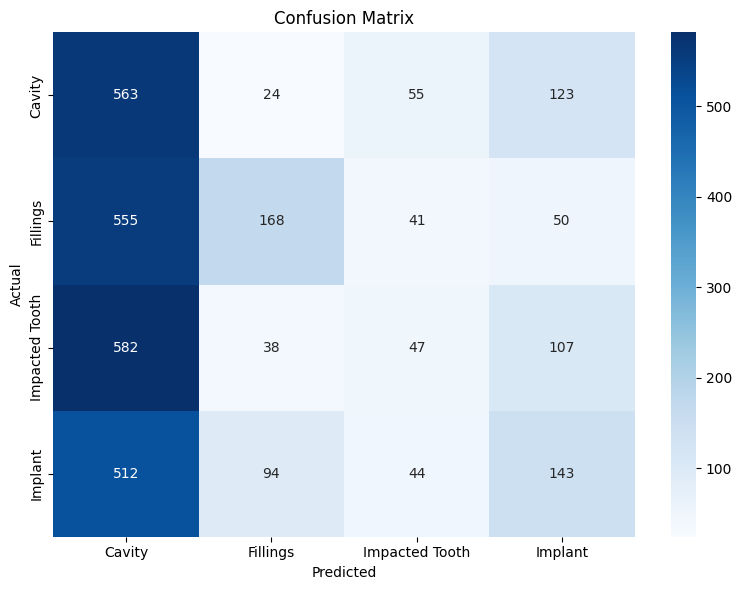

Classification Report:

                precision    recall  f1-score   support

        Cavity       0.25      0.74      0.38       765
      Fillings       0.52      0.21      0.30       814
Impacted Tooth       0.25      0.06      0.10       774
       Implant       0.34      0.18      0.24       793

      accuracy                           0.29      3146
     macro avg       0.34      0.30      0.25      3146
  weighted avg       0.34      0.29      0.25      3146



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load trained model
model = load_model("models/cnn_teeth_health_v5.h5")

# Test data path
test_dir = "D:/Major Project/normalized/test"

# Image preprocessing
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict
pred_probs = model.predict(test_generator)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report (Precision, Recall, F1)
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n")
print(report)
